Question-1Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using  Python.

In [53]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as smf
import statsmodels.formula.api as sm
import warnings
warnings.filterwarnings('ignore')

In [54]:
df=pd.read_csv("E:\\data scines\\Assignment-Data sciencs\\simple linear regression\\delivery_time.csv")
print(df)

    Delivery Time  Sorting Time
0           21.00            10
1           13.50             4
2           19.75             6
3           24.00             9
4           29.00            10
5           15.35             6
6           19.00             7
7            9.50             3
8           17.90            10
9           18.75             9
10          19.83             8
11          10.75             4
12          16.68             7
13          11.50             3
14          12.03             3
15          14.88             4
16          13.75             6
17          18.11             7
18           8.00             2
19          17.83             7
20          21.50             5


In [79]:
df.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


# EDA and Data Visualization##

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [57]:
df.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [58]:
df.isnull().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

In [59]:
df[df.duplicated()].shape

(0, 2)

# Checking The Outliers

Text(0.5, 1.0, 'Sorting Time')

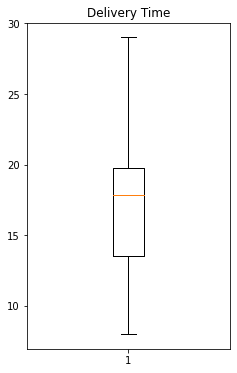

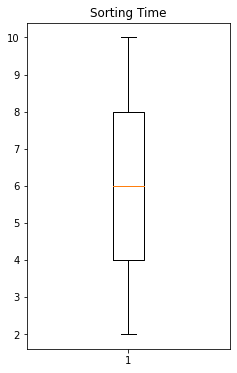

In [60]:
plt.subplots(figsize=(8,6))
plt.subplot(121)
plt.boxplot(df['Delivery Time'])
plt.title('Delivery Time')
plt.subplots(figsize=(8,6))
plt.subplot(122)
plt.boxplot(df['Sorting Time'])
plt.title('Sorting Time')

In [61]:
df.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


# Visualization of correlation

<AxesSubplot:xlabel='Delivery Time', ylabel='Sorting Time'>

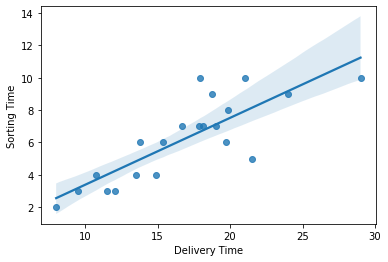

In [62]:
sns.regplot( x='Delivery Time',y='Sorting Time',data=df)

# Checking for Homoscedasticity or Hetroscedasticity¶

Text(0.5, 1.0, 'Homoscedasticity')

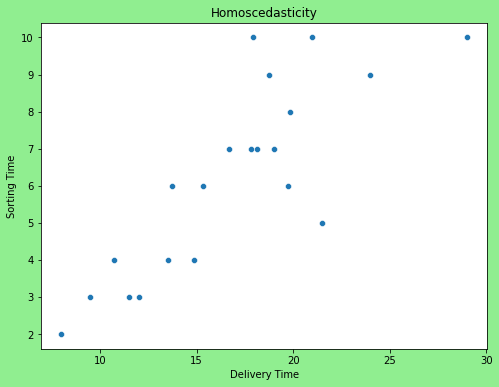

In [63]:
plt.figure(figsize=(8,6),facecolor='lightgreen')
sns.scatterplot(x='Delivery Time',y='Sorting Time',data=df)
plt.title('Homoscedasticity')

In [64]:
df.var()

Delivery Time    25.754619
Sorting Time      6.461905
dtype: float64

# Feature Engineering

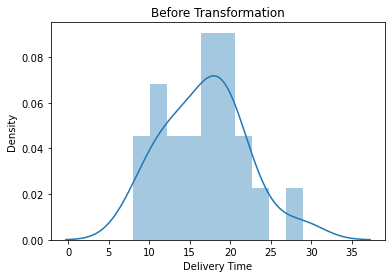

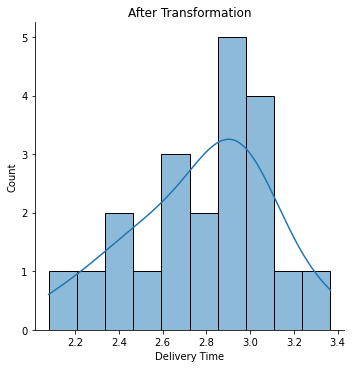

In [65]:
sns.distplot(df['Delivery Time'],bins = 10, kde = True)
plt.title('Before Transformation')
sns.displot(np.log(df['Delivery Time']),bins = 10, kde = True)
plt.title('After Transformation')
plt.show()

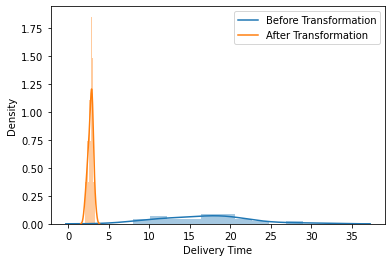

In [66]:
labels = ['Before Transformation','After Transformation']
sns.distplot(df['Delivery Time'], bins = 10, kde = True)
sns.distplot(np.log(df['Delivery Time']), bins = 10, kde = True)
plt.legend(labels)
plt.show()

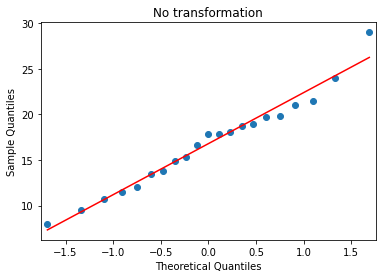

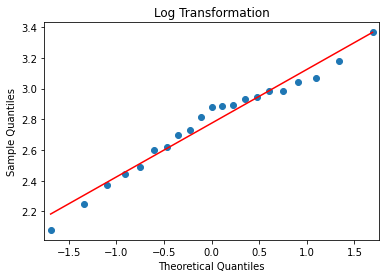

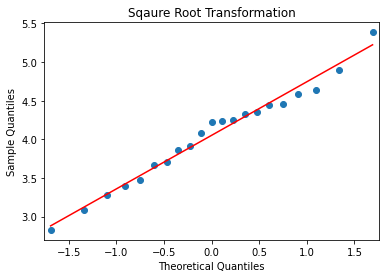

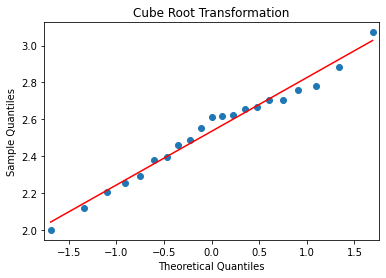

In [67]:
smf.qqplot((df['Delivery Time']),line='r')
plt.title('No transformation')
smf.qqplot(np.log(df['Delivery Time']),line='r')
plt.title('Log Transformation')
smf.qqplot(np.sqrt(df['Delivery Time']),line='r')
plt.title('Sqaure Root Transformation')
smf.qqplot(np.cbrt(df['Delivery Time']),line='r')
plt.title('Cube Root Transformation')
plt.show()

In [68]:
x=df['Delivery Time']
y=df['Sorting Time']

In [75]:
import statsmodels.formula.api as smf
model=smf.ols('y~x',data=df).fit()

In [76]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Mon, 08 Aug 2022   Prob (F-statistic):           3.98e-06
Time:                        02:53:06   Log-Likelihood:                -36.839
No. Observations:                  21   AIC:                             77.68
Df Residuals:                      19   BIC:                             79.77
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.7567      1.134     -0.667      0.513      -3.130       1.617
x              0.4137      0.065      6.387      0.000       0.278       0.549
==============================================================================
Omnibus:                        1.409   Durbin-Watson:                   1.346
Prob(Omnibus):                  0.494   Jarque-Bera (JB):                0.371
Skew:                           0.255   Prob(JB):                        0.831
Kurtosis:                       3.405   Cond. No.                         62.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [77]:
model.params

Intercept   -0.756673
x            0.413744
dtype: float64

# Log Transformation on Data

In [47]:
model1=smf.ols('np.log(x)~np.log(y)',data=df).fit()

In [48]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              np.log(x)   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     64.39
Date:                Mon, 08 Aug 2022   Prob (F-statistic):           1.60e-07
Time:                        02:28:52   Log-Likelihood:                 10.291
No. Observations:                  21   AIC:                            -16.58
Df Residuals:                      19   BIC:                            -14.49
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.7420      0.133     13.086      0.000       1.463       2.021
np.log(y)      0.5975      0.074      8.024      0.000       0.442       0.753
==============================================================================
Omnibus:                        1.871   Durbin-Watson:                   1.322
Prob(Omnibus):                  0.392   Jarque-Bera (JB):                1.170
Skew:                           0.577   Prob(JB):                        0.557
Kurtosis:                       2.916   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Square Root Transformation

In [49]:
model2=smf.ols('np.sqrt(x)~np.sqrt(y)',data=df).fit()

In [28]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             np.sqrt(x)   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     51.16
Date:                Sat, 06 Aug 2022   Prob (F-statistic):           8.48e-07
Time:                        04:52:05   Log-Likelihood:                -5.7320
No. Observations:                  21   AIC:                             15.46
Df Residuals:                      19   BIC:                             17.55
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.6135      0.349      4.628      0.000       0.884       2.343
np.sqrt(y)     1.0022      0.140      7.153      0.000       0.709       1.295
==============================================================================
Omnibus:                        2.869   Durbin-Watson:                   1.279
Prob(Omnibus):                  0.238   Jarque-Bera (JB):                1.685
Skew:                           0.690   Prob(JB):                        0.431
Kurtosis:                       3.150   Cond. No.                         13.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Cube Root Tansformation

In [50]:
model3=smf.ols('np.cbrt(x)~np.cbrt(y)',data=df).fit()

In [51]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             np.cbrt(x)   R-squared:                       0.744
Model:                            OLS   Adj. R-squared:                  0.731
Method:                 Least Squares   F-statistic:                     55.25
Date:                Mon, 08 Aug 2022   Prob (F-statistic):           4.90e-07
Time:                        02:29:36   Log-Likelihood:                 13.035
No. Observations:                  21   AIC:                            -22.07
Df Residuals:                      19   BIC:                            -19.98
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.0136      0.207      4.900      0.000       0.581       1.447
np.cbrt(y)     0.8456      0.114      7.433      0.000       0.607       1.084
==============================================================================
Omnibus:                        2.570   Durbin-Watson:                   1.292
Prob(Omnibus):                  0.277   Jarque-Bera (JB):                1.532
Skew:                           0.661   Prob(JB):                        0.465
Kurtosis:                       3.075   Cond. No.                         16.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""